In [1]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

# 将 NN 的预测结果（array 的 array 转化成 list）
def NNPre_to_list(NN_pre):
    pre = []
    for i in range(len(NN_pre)):
        pre.append(NN_pre[i][0])    
    return pre


import warnings
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings("ignore")

In [2]:
base_path = 'D:/DataSet/Credit/'
train = pd.read_csv(base_path + 'featured/train_all_feature.csv')
test = pd.read_csv(base_path + 'featured/test_all_feature.csv')

one_hot = 0
if one_hot:
    train = pd.get_dummies(train)
    test = pd.get_dummies(test)
    test = test.drop(['cat_query_org_A','cat_query_org_B'],axis=1)
    
col_to_drop = [
    # 1
    'count_house_loan_ln',# 0.97232912500359225)
    'count_house_loan',# 0.65395611105534779)
    'edu_level_other',# 0.57350198625873861)
    'count_payment_state_E_ln',# 0.51044888053676218)
    'count_attention_ln',# 0.32350891467937332)
    'count_commercial_loan',# 0.0)
    'count_sixty_ovd_dw',# 0.0)
    'count_sixty_ovd_months',# 0.0)
    'ind_sixty_max_duration',# 0.0)
    'marry_status_other',# 0.0)
    'count_study_loan_ln',# 0.0)
    'count_housing_accumulation_ln',# 0.0)
    'count_commercial_housing_ln',# 0.0)
    'count_combination_ensure_ln',# 0.0)
    'ind_other_counts_lnd',# 0.0)
    'count_combination_lnd',# 0.0)
    'count_pledge_guarantee_lnd',# 0.0)
    'count_ensure_lnd',# 0.0)
    'count_other_guarantee_lnd',# 0.0)
    'count_combination_ensure_lnd',# 0.0)
    'count_farmer_joint_lnd',# 0.0)
    'count_pledge_guarantee_bail_lnd',# 0.0)
    # 10
    'ind_curr_overdue_cyc_lnd',# 9.1747017468829988)
    'ind_unact_counts_lnd',# 8.1829607049772104)
    'ind_other_counts',# 8.1190294047611253)
    'count_pledge_guarantee_bail_ln',# 4.9866824922417035)
    'count_sharedebt',# 4.25470982342895)
    'marry_status_unmarried',# 3.5268450817329375)
    'count_normal_ln',# 3.1544560288384238)
    'count_farmer_joint_ln',# 2.8250789765495536)
    'not_clear_account_count',# 2.438362051462843)
    'count_car_loan_ln',# 2.0244134983035815)
    'count_payment_state_E_lnd',# 1.9511014375106948)
    # 40
    'ind_normal_counts',# 38.981578298058366)
    'count_ensure_ln',# 32.686012781155711)
    'not_logout_pre_account_count',# 29.035934862113912)
    'count_spl',# 26.621401271906876)
    'not_logout_pre_finance_org_count',# 20.88833411697636)
    'count_debit_card_ovd_dw',# 20.552771641255653)
    'ind_clear_counts_lnd',# 18.63633007759838)
    'cat_query_reason_mal',# 18.012892273855371)
    'count_other_guarantee_ln',# 15.719418555370231)
    'count_pledge_guarantee_ln',# 14.603172531948651)
    'count_standard_loancard',# 14.257967916620288)
    'count_combination_ln',# 13.225866749150008)
    'marry_status_divorced',# 12.996673186745294)
    'flt_highest_sixty_oa_per_mon',# 12.496437876453976)
    'count_farmer_loan_ln',# 12.034259912867824)
    # 60
    'curr_overdue_cyc_days',# 58.533138767951407)
    'not_logout_pre_max_credit_limit_per_org',# 55.545770066417433)
    'not_logout_pre_finance_corp_count',# 54.909995520093744)
    'has_fund',# 53.524477466077244)
    'edu_level_bachelor',# 51.681921368379456)
    'cat_query_reason_sqe',# 50.507370364531575)
    'not_clear_finance_org_count',# 50.499752342403504)
    'count_payment_state_B_ln',# 49.675949679726415)
    'count_ovd',# 47.284280675138668)
    'marry_status_married',# 47.141063732728689)
    # 100
    'count_payment_state_D_ln',# 98.582591891500016)
    'not_logout_finance_org_count',# 97.63379220401383)
    'count_credit_loan_ln',# 96.057688729626022)
    'count_payment_state_D_lnd',# 94.52677681813546)
    'all_highest_oa_per_mon',# 93.758390716396264)
    'count_consumption loan_ln',# 92.34403542313882)
    'not_logout_pre_latest_6m_used_avg_amount',# 85.357040829001591)
    'balance',# 85.186190705260103)
    'cat_query_reason_la',# 83.737758346562558)
    'ind_clear_counts',# 82.467554392775014)
    'count_unknown_ln',# 73.400641666623201)
    'not_logout_pre_min_credit_limit_per_org',# 70.752886069309909)
    'not_logout_pre_credit_limit',# 68.394379619115668)
    'not_logout_account_count',# 67.926934887483739)
    'lnd_ovd_sum_amount',# 67.598474433716945)
    'flt_highest_debit_card_oa_per_mon',# 64.9057845815354)
    'count_loan_ovd_dw',# 64.132474960621153)
    'count_operating_loan_ln',# 63.127772355688421)
    'not_clear_finance_corp_count',# 62.877948676798582)
    # 180
    'not_logout_latest_6m_used_avg_amount',# 176.32317263727683)
    'ind_loan_max_duration',# 167.56724876084013)
    'count_credit_loan_lnd',# 166.96045957856194)
    'all_max_duration',# 153.57957111737943)
    'not_clear_balance',# 153.18548993022915)
    'flt_highest_loan_oa_per_mon',# 150.5264464131252)
    'flt_sum_amount',# 149.83162201460962)
    'used_highest_amount_lnd',# 136.85598322859255)
    'scheduled_payment_amount',# 128.02030046387119)
    'latest6_month_used_avg_amount_lnd',# 124.58135686300396)
    'ind_org_counts',# 120.5490321578975)
    'ind_debit_card_max_duration',# 118.53218655429413)
    'edu_level_junior',# 117.02178169627837)
    'lnd_ovd_sum_last_months',# 114.74345491704378)
    'used_credit_limit_amount_lnd',# 114.2672848868574)
    'ave_ovd_amount',# 114.06571798355444)
    'count_other_loan',# 111.82596886962884)
    'range_lnd_ovd',# 109.13363916690426)
    'not_logout_pre_used_credit_limit',# 105.64340446411771)
    'count_sum_ovd_dw',# 104.97563024241767)
    # flt_noise
    'not_logout_max_credit_limit_per_org',# 211.80030432198566)
    # 240
    #'not_logout_finance_corp_count',# 217.97120979038462)
]

train = train.drop(col_to_drop, axis=1)
test = test.drop(col_to_drop,axis=1)

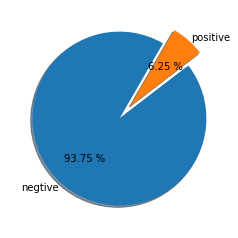

In [60]:
fig = plt.figure()
fig.set(alpha=0.9)
fig.set_size_inches(4, 4)

labels = 'negtive', 'positive'
fracs = [93.75, 6.25]
explode = [0, 0.2] # 0.1 凸出这部分
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
plt.pie(x=fracs, labels=labels, explode=explode,autopct='%3.2f %%',
        shadow=True, labeldistance=1.05,startangle = 60,pctdistance = 0.6,frame=0,counterclock=1
        )
plt.show()

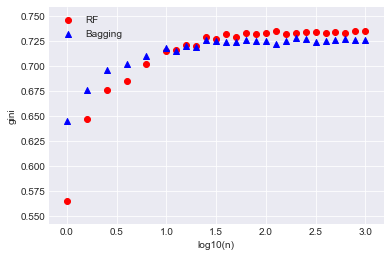

In [6]:
gini_RF = [ 0.56538565,  0.6472992 ,  0.67650133,  0.68540831,  0.70167405,
            0.71518497,  0.71613343,  0.72120886,  0.71989583,  0.72885302,
            0.72657462,  0.73212372,  0.7292806 ,  0.73315803,  0.73167733,
            0.73281746,  0.73513538,  0.73252763,  0.73343584,  0.73439654,
            0.73394977,  0.73340869,  0.73403382,  0.73338032,  0.73550815, 0.73506449]

gini_beg = [ 0.64516834,  0.67592501,  0.69618212,  0.70184533,  0.70960835,
             0.71846732,  0.71490907,  0.71995838,  0.71861701,  0.72576302,
             0.72480228,  0.72436639,  0.72429179,  0.72587789,  0.72491385,
             0.72482283,  0.7218728 ,  0.72490513,  0.72807305,  0.72659443,
             0.72385678,  0.72496335,  0.72569991,  0.72716153,  0.72596835, 0.72636399]
log_x = [0,0.2,0.4,0.6,0.8,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]
x = np.power(10,log_x)
fig = plt.figure()
fig.set(alpha=0.2)

l1 = plt.scatter(log_x,np.array(gini_RF), marker='o', c='r')
l2 = plt.scatter(log_x,np.array(gini_beg), marker='^', c='b')

plt.legend(handles = [l1,l2], labels = ['RF', 'Bagging'])
plt.xlabel(u'log10(n)')
plt.ylabel(u'gini')
plt.show()

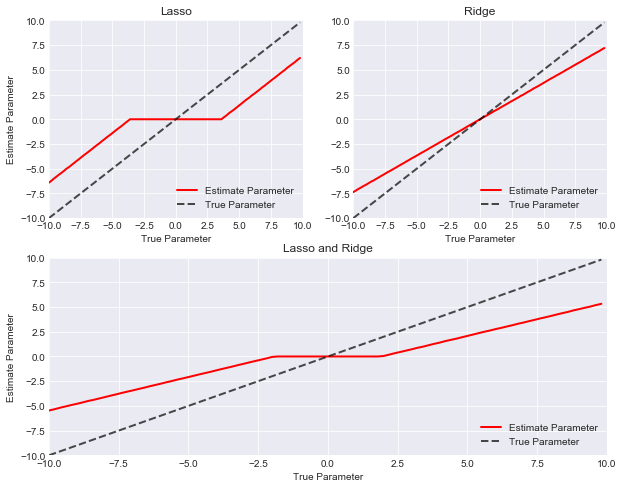

In [8]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

k = 0.5
K_gu_l1 = []
K_gu_l2 = []
K_gu_l12 = []

for k in (np.array(range(100))-50)/5:
    
    x = (np.array(range(1000))-500)/100
    x = pd.DataFrame(x,columns=['x'])
    x['noise'] = np.random.normal(loc=0.0, scale=0.02, size=1000)
    
    y = k * x.x + np.random.normal(loc=0.0, scale=0.8, size=1000)

    
    clf_l1 = Lasso(alpha=30, fit_intercept=0)
    clf_l2 = Ridge(alpha=3000, fit_intercept=0)
    clf_l12 = ElasticNet(alpha=20, l1_ratio=0.8, fit_intercept=0)
    
    clf_l1.fit(x,y)
    clf_l2.fit(x,y)
    clf_l12.fit(x,y)
    
    K_gu_l1.append(clf_l1.coef_[0])
    K_gu_l2.append(clf_l2.coef_[0])
    K_gu_l12.append(clf_l12.coef_[0])
    
K = (np.array(range(100))-50)/5

fig = plt.figure()
fig.set(alpha=0)
fig.set_size_inches(10, 8)

plt.subplot2grid((2,2), (0,0))
plt.plot(K,K_gu_l1,'-',label='Estimate Parameter',lw=2,color=(1, 0.0, 0))
plt.plot(K,K,'--',label='True Parameter',lw=2,color=(0.0, 0, 0),alpha = 0.7)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend(loc="lower right")
plt.title('Lasso')
plt.xlabel('True Parameter')  
plt.ylabel('Estimate Parameter') 


plt.subplot2grid((2,2), (0,1))
plt.plot(K,K_gu_l2,'-',label='Estimate Parameter',lw=2,color=(1, 0.0, 0))
plt.plot(K,K,'--',label='True Parameter',lw=2,color=(0.0, 0, 0),alpha = 0.7)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend(loc="lower right")
plt.title('Ridge')
plt.xlabel('True Parameter')  
#plt.ylabel('Estimate Parameter') 

plt.subplot2grid((2,2), (1,0), colspan=2)
plt.plot(K,K_gu_l12,'-',label='Estimate Parameter',lw=2,color=(1, 0.0, 0))
plt.plot(K,K,'--',label='True Parameter',lw=2,color=(0.0, 0, 0),alpha = 0.7)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend(loc="lower right")
plt.title('Lasso and Ridge')
plt.xlabel('True Parameter') 
plt.ylabel('Estimate Parameter') 
plt.show()

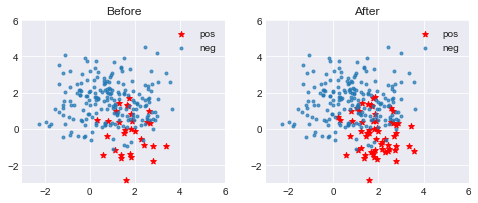

In [9]:
x_pos = np.random.normal(loc=2, scale=0.8, size=30)
y_pos = np.random.normal(loc=-0.2, scale=1, size=30)

x_neg = np.random.normal(loc=1, scale=1.2, size=200)
y_neg = np.random.normal(loc=1.5, scale=1.2, size=200)


fig = plt.figure()
fig.set(alpha=0)
fig.set_size_inches(8, 3)

plt.subplot2grid((1,2), (0,0))
plt.scatter(x_pos,y_pos, marker='*', c=(1,0,0),alpha=1, label='pos')
plt.scatter(x_neg,y_neg, marker='.', alpha=0.7, label='neg')
plt.legend()
plt.title('Before')
plt.xlim(-3, 6)
plt.ylim(-3, 6)



plt.subplot2grid((1,2), (0,1))
plt.scatter(np.append(x_pos, np.random.normal(loc=2, scale=0.8, size=30)),
            np.append(y_pos, np.random.normal(loc=-0.2, scale=1, size=30)), 
            marker='*', c=(1,0,0),alpha=1, label='pos')
plt.scatter(x_neg,y_neg, marker='.',alpha=0.7, label='neg')
plt.legend()
plt.title('After')
plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.show()

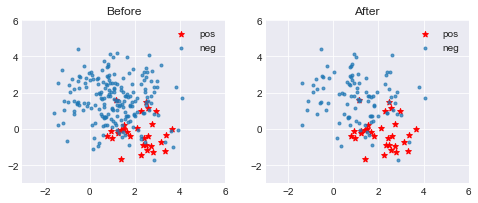

In [10]:
x_pos = np.random.normal(loc=2, scale=0.8, size=30)
y_pos = np.random.normal(loc=-0.2, scale=1, size=30)

x_neg = np.random.normal(loc=1, scale=1.2, size=200)
y_neg = np.random.normal(loc=1.5, scale=1.2, size=200)


fig = plt.figure()
fig.set(alpha=0)
fig.set_size_inches(8, 3)

plt.subplot2grid((1,2), (0,0))
plt.scatter(x_pos,y_pos, marker='*', c=(1,0,0),alpha=1, label='pos')
plt.scatter(x_neg,y_neg, marker='.', alpha=0.7, label='neg')
plt.legend()
plt.title('Before')
plt.xlim(-3, 6)
plt.ylim(-3, 6)



plt.subplot2grid((1,2), (0,1))
plt.scatter(x_pos,y_pos, marker='*', c=(1,0,0),alpha=1, label='pos')
plt.scatter(x_neg[:100],y_neg[:100], marker='.', alpha=0.7, label='neg')
plt.legend()
plt.title('After')
plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.show()

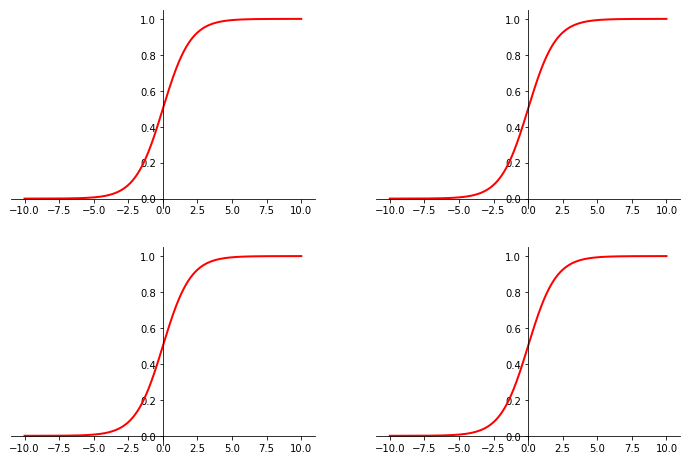

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,1000)
y = sigmoid(x)

fig = plt.figure()
fig.set(alpha=0)
fig.set_size_inches(12, 8)

plt.subplot2grid((2,2), (0,0))
plt.plot(x,y,lw=2,color=(1, 0.0, 0))
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))


plt.subplot2grid((2,2), (0,1))
plt.plot(x,y,lw=2,color=(1, 0.0, 0))
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))



plt.subplot2grid((2,2), (1,0))
plt.plot(x,y,lw=2,color=(1, 0.0, 0))
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))



plt.subplot2grid((2,2), (1,1))
plt.plot(x,y,lw=2,color=(1, 0.0, 0))
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))




plt.show()

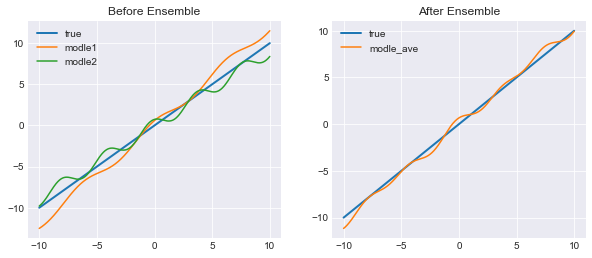

In [25]:
x = np.linspace(-10,10,1000)
y1 = 1.2*x + 0.6*np.sin(x+1.6)
y2 = 0.9*x + 0.8*np.cos(1.6*x+0.4)
y3 = (y1+y2)/2

fig = plt.figure()
fig.set(alpha=0)
fig.set_size_inches(10, 4)

plt.subplot2grid((1,2), (0,0))
plt.plot(x,x,lw=2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(['true','modle1','modle2'])
plt.title('Before Ensemble')

plt.subplot2grid((1,2), (0,1))
plt.plot(x,x,lw=2)
plt.plot(x,y3)
plt.legend(['true','modle_ave'])
plt.title('After Ensemble')


plt.show()

In [6]:
np.max([1,2,3])

3